## Miembros:
### Celic Gabriel Hernández Archundia
### Diego Iván García Zarza
### Diego Alfredo López Malerva
### Luis Fernando Lezama Araoz
### Emilio Sonck Patillo

In [1]:
from google.colab import drive
from google.colab import files
import matplotlib.pyplot as plt

drive.mount('/content/drive')


Mounted at /content/drive


In [62]:
# Incluya aquí su código para importar librerías y datos

import pandas as pd
import seaborn as sns
import numpy as np

datosResponses = pd.read_csv("/content/drive/MyDrive/Tecmilenio/Datos_Masivos/responses.csv")
datosResponses.head(n=5)


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [73]:
datosResponsesLimpios = datosResponses.dropna()

datosResponsesLimpios['Gender'] = datosResponsesLimpios['Gender'].map({'female': 1, 'male': 0})
datosResponsesLimpios.head(n=5)

<ipython-input-73-7c0289cc46bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosResponsesLimpios['Gender'] = datosResponsesLimpios['Gender'].map({'female': 1, 'male': 0})


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,1,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,1,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,1,right handed,secondary school,no,city,block of flats
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,1,right handed,secondary school,no,village,house/bungalow
5,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,...,20.0,186.0,77.0,1.0,0,right handed,secondary school,no,city,block of flats


In [74]:
''' Columnas que posean valores no numéricos en del Dataframe Responses'''
columnasDataFrame_con_Strings = []

for columna in datosResponsesLimpios.columns:
  for valor in datosResponsesLimpios[columna]:
    if isinstance(valor, str) and not columna in columnasDataFrame_con_Strings:
      columnasDataFrame_con_Strings.append(columna)


''' Buscar las columnas que posean cierto valor de tipo String '''
valor_a_buscar = "female"
columnas_con_valor = []

'''  '''
valores_existentes = []


for columna in datosResponsesLimpios.columns:
 for valor in datosResponsesLimpios[columna]:
  if valor == valor_a_buscar:
    if not columna in columnas_con_valor:
      columnas_con_valor.append(columna)

for columnas in columnas_con_valor:
  for valores in datosResponsesLimpios[columnas]:
    if not valores in valores_existentes and isinstance(valores, str):
      valores_existentes.append(valores)

nFilas, nColumnas = datosResponsesLimpios.shape

print(f'Número de columnas: {nColumnas}\nNúmero de filas: {nFilas}\n')

print(f'Columnas del DataFrame que posean Strings: ', columnasDataFrame_con_Strings, "\n")

print(f'Columnas donde existe "{valor_a_buscar}": ', columnas_con_valor,"\n")

for n in columnas_con_valor:
  valores_particulares = []
  for valor in datosResponsesLimpios[n]:
    if valor in valores_existentes and not valor in valores_particulares:
      valores_particulares.append(valor)
  print(f'Valores existentes de tipo STRING en "{n}": ', valores_particulares)



Número de columnas: 150
Número de filas: 674

Columnas del DataFrame que posean Strings:  ['Smoking', 'Alcohol', 'Punctuality', 'Lying', 'Internet usage', 'Left - right handed', 'Education', 'Only child', 'Village - town', 'House - block of flats'] 

Columnas donde existe "female":  [] 



In [75]:
#datosResponsesLimpios = datosResponses.dropna()
#datosNaN = datosResponsesLimpios.isna()
datosResponsesLimpios = datosResponsesLimpios.drop(columnasDataFrame_con_Strings, axis=1)
#datosResponsesLimpios = datosResponsesLimpios.dropna()

In [76]:
X_cols = datosResponsesLimpios.columns.values
X_cols

array(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll',
       'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Movies',
       'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War',
       'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western',
       'Action', 'History', 'Psychology', 'Politics', 'Mathematics',
       'Physics', 'Internet', 'PC', 'Economy Management', 'Biology',
       'Chemistry', 'Reading', 'Geography', 'Foreign languages',
       'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Religion',
       'Countryside, outdoors', 'Dancing', 'Musical instruments',
       'Writing', 'Passive sport', 'Active sport', 'Gardening',
       'Celebrities', 'Shopping', 'Science and technology', 'Theatre',
       'Fun with friends', 'Adrenaline sports', 'Pets', 'Flying', 'Storm',
       'Darkness', 'Heights', '

In [95]:
datosResponsesG = datosResponsesLimpios[["Gender"]]
datosResponsesG.columns

Index(['Gender'], dtype='object')

In [100]:
X = datosResponsesLimpios.values
X.shape

(674, 140)

# StandardScaler

La estandarización es una técnica de escalado en la que hace que los datos no tengan escala convirtiendo la distribución estadística de los datos en el siguiente formato

media-0
desviación estándar-1

$$z= \frac{x-\mu}{\sigma}$$

La función *StandardScaler* nos permite estandarizar los datos en un formato estándar.


In [101]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)



In [102]:
cov_m = np.cov(X_scaled.T)
cov_m.shape

(140, 140)

In [104]:
eigenvalues, eigenvectors = np.linalg.eig(cov_m)

In [105]:
eigenvalues

array([9.88771934, 7.63052532, 6.9033704 , 4.24270563, 4.13441412,
       3.33912042, 2.98021034, 2.62700381, 2.43871851, 2.26666347,
       2.22803564, 2.11891136, 2.00817138, 1.94825946, 1.80195631,
       1.74421935, 1.7309882 , 1.693008  , 1.62056833, 1.60092225,
       1.50222362, 1.46912355, 1.42108415, 1.36341799, 1.35484257,
       1.33174707, 1.28436327, 1.28139958, 1.26853864, 1.25032263,
       1.23547163, 1.16802596, 1.1494322 , 1.1281927 , 1.12350421,
       1.10124806, 1.0832076 , 1.07108595, 1.00764297, 1.04408872,
       1.03139531, 1.03928746, 0.97250706, 0.9516106 , 0.9342538 ,
       0.93985487, 0.89617732, 0.9017097 , 0.88297125, 0.8666274 ,
       0.85846726, 0.13255622, 0.84872101, 0.84362475, 0.1387661 ,
       0.82342902, 0.16427551, 0.17326326, 0.17430385, 0.81289985,
       0.80117477, 0.77788395, 0.77439345, 0.7636287 , 0.18474267,
       0.74653545, 0.7446531 , 0.73903176, 0.19003911, 0.72275832,
       0.71818047, 0.19326634, 0.19642278, 0.19922906, 0.69934

In [106]:
eigenvalues.shape


(140,)

In [107]:
eigenvectors.shape


(140, 140)

In [108]:
eigenvectors = eigenvectors.T

In [109]:
eigenvectors[0, :]

array([-0.04125353,  0.060636  , -0.04607907, -0.06356351,  0.00585082,
       -0.04890538, -0.12878801, -0.08545713,  0.0175586 ,  0.09197942,
        0.04604732,  0.02112723,  0.01008961, -0.0521453 , -0.01664388,
       -0.00310269, -0.12528724,  0.03274516, -0.05085307, -0.00940264,
        0.07952599,  0.08784341, -0.0187831 , -0.18113774,  0.11223777,
        0.12371465, -0.14210836, -0.09489148,  0.02702621,  0.1155351 ,
        0.13752618,  0.01915589, -0.07232231,  0.06307796,  0.07043497,
        0.09447997,  0.06082703,  0.15181368,  0.02073375, -0.0936059 ,
       -0.04603642, -0.13542701,  0.01830036, -0.0886759 , -0.07573698,
        0.00086354,  0.14286017, -0.11760936, -0.06451527, -0.07815143,
       -0.14092147, -0.05431035, -0.06646593,  0.05121634,  0.0552863 ,
       -0.08973604, -0.09947375, -0.15837532,  0.10757229, -0.14407682,
       -0.01531255,  0.08383004, -0.06177555, -0.08632479, -0.13985174,
       -0.14028517, -0.04997614, -0.11743445, -0.10867448, -0.10

In [110]:
eigenvalues = np.cumsum(eigenvalues)
eigenvalues /= eigenvalues.max()
eigenvalues

array([0.07052178, 0.12494467, 0.17418129, 0.20444137, 0.23392909,
       0.25774456, 0.27900019, 0.29773666, 0.31513024, 0.33129667,
       0.3471876 , 0.36230022, 0.37662302, 0.39051851, 0.40337053,
       0.41581076, 0.42815662, 0.44023159, 0.4517899 , 0.4632081 ,
       0.47392234, 0.48440051, 0.49453605, 0.50426031, 0.51392339,
       0.52342176, 0.53258217, 0.54172145, 0.55076899, 0.55968662,
       0.56849832, 0.57682899, 0.58502704, 0.5930736 , 0.60108672,
       0.60894111, 0.61666683, 0.62430609, 0.63149286, 0.63893957,
       0.64629575, 0.65370822, 0.66064439, 0.66743153, 0.67409487,
       0.68079815, 0.68718992, 0.69362115, 0.69991873, 0.70609974,
       0.71222255, 0.71316798, 0.71922128, 0.72523823, 0.72622794,
       0.73210085, 0.73327251, 0.73450827, 0.73575145, 0.74154926,
       0.74726345, 0.75281152, 0.75833469, 0.76378109, 0.76509872,
       0.77042321, 0.77573427, 0.78100523, 0.78236064, 0.78751554,
       0.79263779, 0.79401622, 0.79541715, 0.79683811, 0.80182

In [111]:
p = eigenvectors [0:10, :]
p.shape

(10, 140)

In [112]:
data_new = np.dot(p, X_scaled.T)
data_new.shape


(10, 674)

In [113]:
data_new = data_new.T
data_new.shape

(674, 10)

In [377]:
df_new = pd.DataFrame(data_new, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10'])

df_new.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.338975,-0.684086,1.361538,-4.637964,0.181135,-1.124362,0.874900,2.278169,-1.723283,-0.775079
1,2.401586,-2.240078,-1.530341,0.230806,1.717598,1.277863,0.019388,3.842535,-1.471390,1.099471
2,-1.928219,2.951864,-2.695195,0.979674,3.567944,-0.818058,0.791550,-1.274226,-1.327892,-1.293574
3,-0.561291,-0.281020,0.018970,-2.084097,-0.879005,-0.111073,1.344261,-1.118807,-3.118063,-1.423621
4,3.463875,2.153627,-2.158582,0.353189,0.879160,-1.122210,0.761481,0.608442,0.708337,0.002215


In [361]:
import seaborn as sns
import matplotlib.pyplot as plt

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'Gender'],
      dtype='object')


<Axes: xlabel='PC7', ylabel='PC9'>

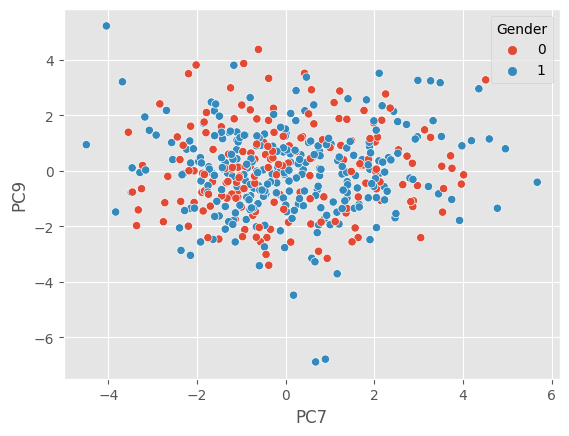

In [414]:
labels = pd.DataFrame(data=datosResponsesLimpios.Gender) # Me creas un data set de una columna (Gender)
#labels = labels.rename(columns={0: 'label'})
#df_new = pd.concat([df_new, labels], axis=1, join="inner")


print(df_new.columns)
# PC7PC10, PC8PC9, PC4PC7, PC2PC9, PC3PC9, PC4PC9, PC7PC10, PC7PC9, PC7PC4,

sns.scatterplot(x='PC7', y='PC9', hue='Gender', data=df_new)

In [145]:
df_new

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Gender
0,-1.338975,-0.684086,1.361538,-4.637964,0.181135,-1.124362,0.874900,2.278169,-1.723283,-0.775079,1
1,2.401586,-2.240078,-1.530341,0.230806,1.717598,1.277863,0.019388,3.842535,-1.471390,1.099471,1
2,-1.928219,2.951864,-2.695195,0.979674,3.567944,-0.818058,0.791550,-1.274226,-1.327892,-1.293574,1
4,3.463875,2.153627,-2.158582,0.353189,0.879160,-1.122210,0.761481,0.608442,0.708337,0.002215,1
5,-3.320547,0.986425,2.136393,-4.752556,0.008489,0.387088,3.717304,1.771532,0.544363,0.513678,0
...,...,...,...,...,...,...,...,...,...,...,...
667,-0.929002,-2.653240,4.293678,-1.346743,1.005299,0.379473,-0.654289,1.304146,0.966950,0.029756,0
670,-3.018952,0.447067,1.005136,2.784819,2.861462,-0.644034,0.193016,0.122390,-1.423822,0.202210,1
671,0.696299,-6.474593,-4.686090,0.894345,0.290396,-0.547450,-0.025047,3.630788,-2.764153,-1.641056,1
672,-3.075351,-1.022022,0.127424,2.155964,0.272054,0.223792,-0.409530,0.975053,-0.474938,-0.575297,1
